In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

**Understanding Dataset**

In [2]:
data=pd.read_csv('adult.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.shape

(32561, 15)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
data.describe(include='object')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [8]:
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

<AxesSubplot:xlabel='income', ylabel='count'>

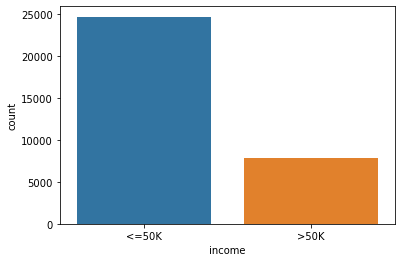

In [12]:
sns.countplot(data.income)

**Feature Selection,EDA**

In [13]:
data.age.unique()

array([90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37,
       29, 61, 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40,
       50, 42, 39, 55, 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81,
       65, 25, 28, 56, 69, 20, 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79,
       88, 84, 85, 86, 87], dtype=int64)

<AxesSubplot:xlabel='income', ylabel='age'>

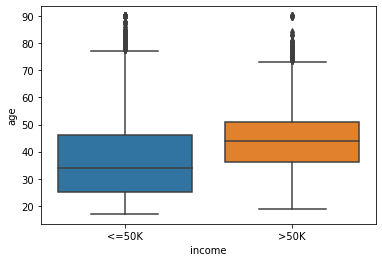

In [14]:
sns.boxplot(data.income,data.age)

<AxesSubplot:xlabel='income', ylabel='fnlwgt'>

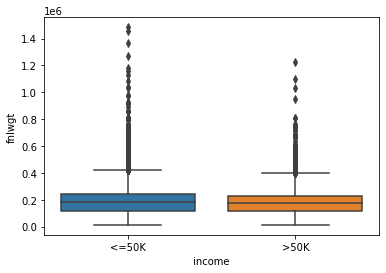

In [15]:
sns.boxplot(data.income,data['fnlwgt'])

<AxesSubplot:xlabel='income', ylabel='education.num'>

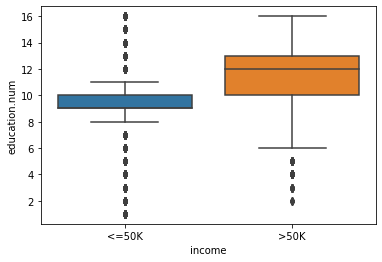

In [18]:
sns.boxplot(data.income,data['education.num'])

<AxesSubplot:xlabel='income', ylabel='capital.gain'>

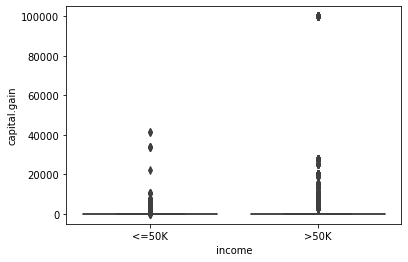

In [20]:
sns.boxplot(data.income,data['capital.gain'])

<AxesSubplot:xlabel='income', ylabel='capital.loss'>

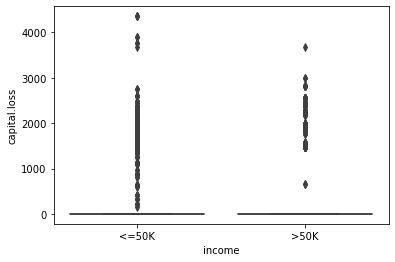

In [21]:
sns.boxplot(data.income,data['capital.loss'])

<AxesSubplot:xlabel='income', ylabel='hours.per.week'>

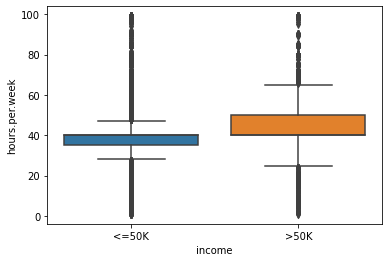

In [22]:
sns.boxplot(data.income,data['hours.per.week'])

In [23]:
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [24]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [25]:
data=data.dropna()

In [26]:
data.income=data.income.replace(['<=50K', '>50K'],[0,1])

In [27]:
data.income=data.income.replace()

<AxesSubplot:>

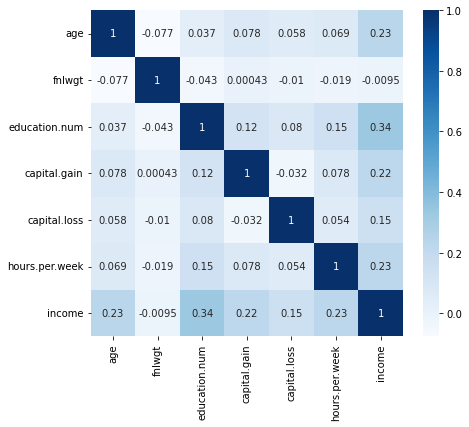

In [28]:
plt.figure(figsize=(7,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [29]:
data.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

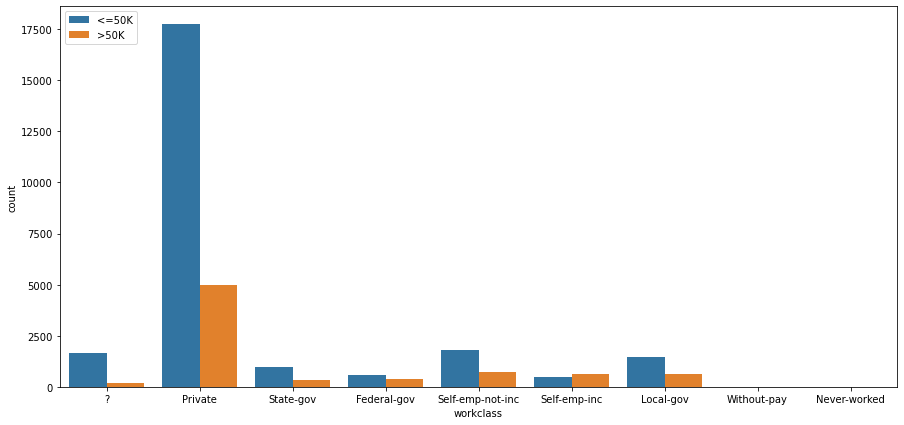

In [30]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data.workclass,hue=data.income)
plt.legend(['<=50K', '>50K'])

In [31]:
data.education.unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

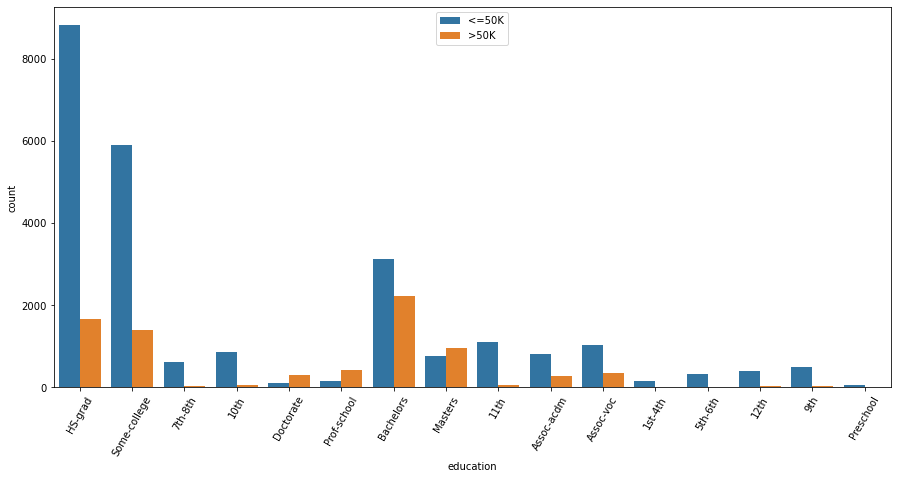

In [32]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data.education,hue=data.income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])

In [34]:
data['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

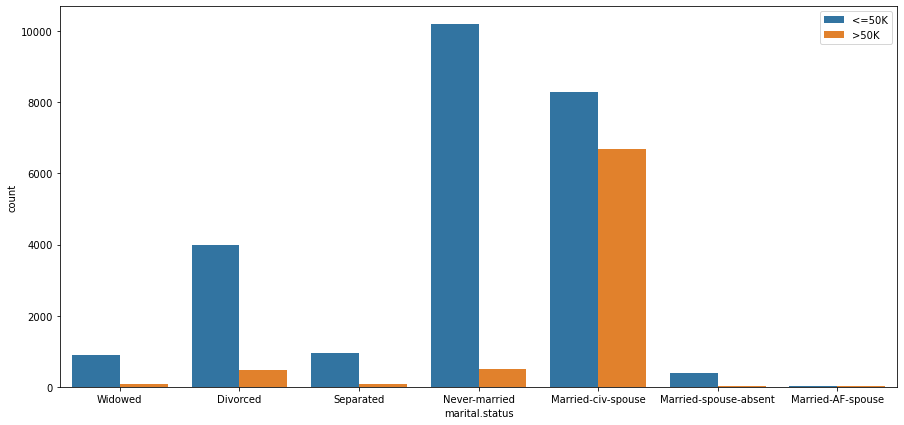

In [35]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data['marital.status'],hue=data.income)
plt.legend(['<=50K', '>50K'])

In [36]:
data.occupation.unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

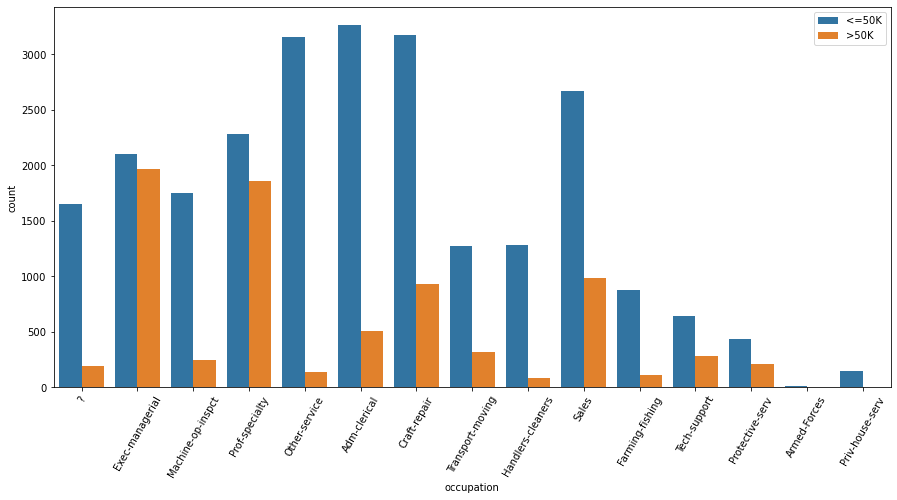

In [37]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data.occupation,hue=data.income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])

In [38]:
data.relationship.unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

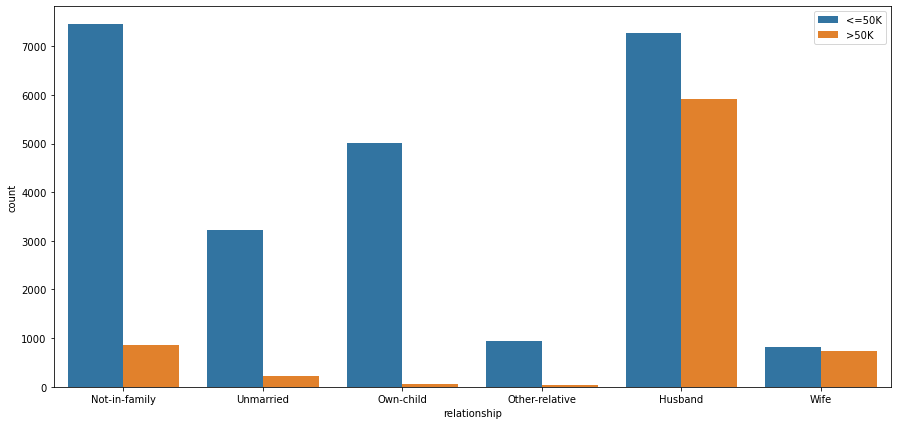

In [39]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data.relationship,hue=data.income)
plt.legend(['<=50K', '>50K'])

In [41]:
data.sex.unique()

array(['Female', 'Male'], dtype=object)

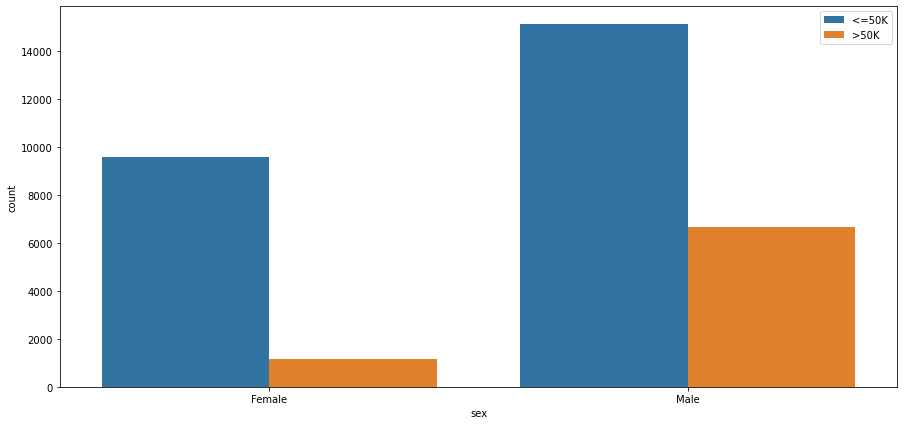

In [42]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data.sex,hue=data.income)
plt.legend(['<=50K', '>50K'])

In [43]:
data['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

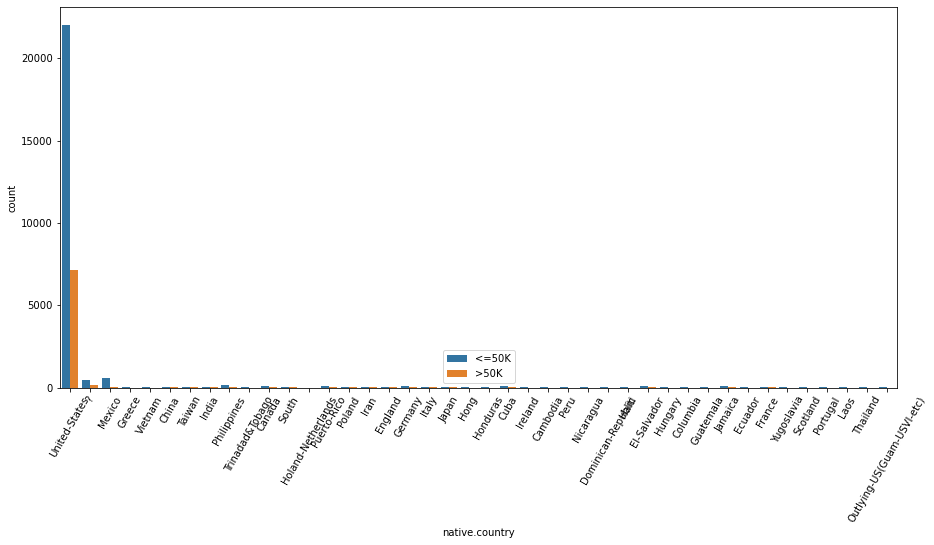

In [44]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data['native.country'],hue=data.income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])
plt.show()

**Data Preprocessing**

In [45]:
x=data.drop(['income'],axis=1)

In [46]:
x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [47]:
numericalcols=list(data.select_dtypes(exclude='object').columns)
numericalcols.pop()
numericalcols

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [48]:
x=pd.get_dummies(x)

In [49]:
x.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,4356,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
data=data.drop(['fnlwgt'],axis=1)

In [51]:
numericalcols

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [52]:
from sklearn.preprocessing import StandardScaler
M=StandardScaler()
x[numericalcols]=M.fit_transform(x[numericalcols])

In [53]:
x.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
y=data.income

In [55]:
x_train,x_test,y_trian,y_test=train_test_split(x,y,random_state=89,test_size=0.3)

**LogisticRegression**

In [56]:
ModelL=LogisticRegression()

In [57]:
ModelL.fit(x_train,y_trian)

LogisticRegression()

In [58]:
ModelL.score(x_test,y_test)

0.8464530658204524

In [59]:
y_predictL=ModelL.predict(x_test)

In [60]:
accuracy_score(y_test,y_predictL)

0.8464530658204524

ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(y_predictL,hist=False,label='Predicted Values')
ax.set_title('LogisticRegression')
plt.legend()

In [62]:
confusion_matrix(y_test,y_predictL)

array([[6877,  491],
       [1009, 1392]], dtype=int64)

<AxesSubplot:>

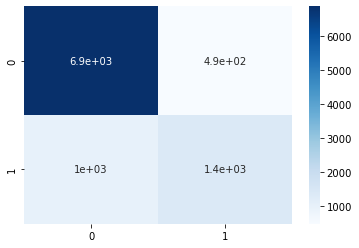

In [63]:
sns.heatmap(confusion_matrix(y_test,y_predictL),annot=True,cmap='Blues')

**Support Vector Classifier**

In [64]:
ModelS=SVC()

In [65]:
ModelS.fit(x_train,y_trian)
ModelS.score(x_test,y_test)

0.8539256832838571

In [66]:
y_predicS=ModelS.predict(x_test)

In [67]:
accuracy_score(y_test,y_predicS)

0.8539256832838571

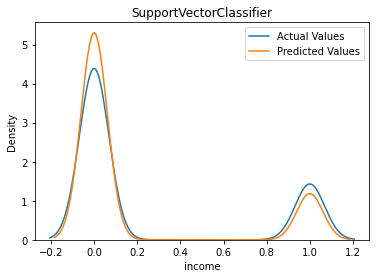

In [68]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(y_predicS,hist=False,label='Predicted Values')
ax.set_title('SupportVectorClassifier')
plt.legend()

In [69]:
confusion_matrix(y_test,y_predicS)

array([[6964,  404],
       [1023, 1378]], dtype=int64)

<AxesSubplot:>

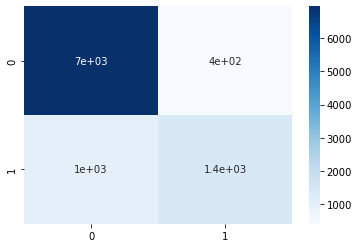

In [70]:
sns.heatmap(confusion_matrix(y_test,y_predicS),annot=True,cmap='Blues')

**KNeighbors Classifier**

In [71]:
ModelK=KNeighborsClassifier(n_neighbors=13)

In [72]:
ModelK.fit(x_train,y_trian)
ModelK.score(x_test,y_test)

0.8328385709898659

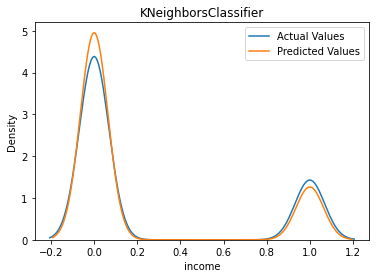

In [73]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(ModelK.predict(x_test),hist=False,label='Predicted Values')
ax.set_title('KNeighborsClassifier')
plt.legend()

In [74]:
confusion_matrix(y_test,ModelK.predict(x_test))

array([[6759,  609],
       [1024, 1377]], dtype=int64)

<AxesSubplot:>

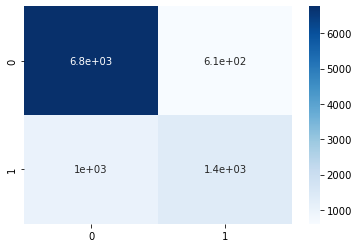

In [75]:
sns.heatmap(confusion_matrix(y_test,ModelK.predict(x_test)),annot=True,cmap='Blues')

**Random Forest Classifier**

In [76]:
ModelR=RandomForestClassifier()
ModelR.fit(x_train,y_trian)
ModelR.score(x_test,y_test)

0.8482956290306071

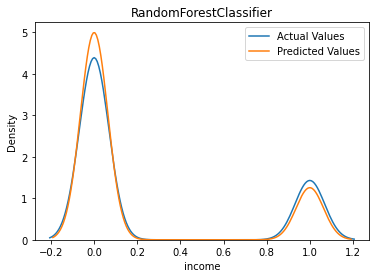

In [77]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(ModelR.predict(x_test),hist=False,label='Predicted Values')
ax.set_title('RandomForestClassifier')
plt.legend()